In [1]:
!pip install scipy 
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
import sklearn
print(sklearn.__version__)
import scipy
print(scipy.__version__)

0.21.1
1.2.1


In [4]:
# concatenate data

path="/Users/jakob/Dokumente/Schule/Jahresarbeit/Projekte/ParticulateMatterAnalysis/data/StuttgartCsvDone/"
cols2drop = ['Uhrzeit-','UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel', 'PM2.5 (µg/m³)-Mittel', 'SO2 (µg/m³)-Mittel', 'CO (mg/m³)-Mittel','NO (µg/m³)-Mittel','NO2 (µg/m³)-Mittel','O3 (µg/m³)-Mittel','Globalstr. (W/m²)-Mittel']

df = pd.DataFrame()

for y in range(2018,2010,-1):
    if y == 2000 or y == 2001:
        continue
    
    print ("\n***year:%d" %y)
    dfx = pd.read_csv(path + "Halbstd-Werte-Stuttgart-Mitte-SZ_%s_D.csv" % (str(y)), index_col=[0], sep = ";")
    for col in cols2drop:
        if col in dfx:
            dfx = dfx.drop(col, axis=1)



    print(dfx.isna().sum())
    print(" new:%d" %len(dfx))

    #print(list(set(list(df.columns)) - set(list(df2.columns))))
    df = pd.concat([df,dfx], sort=False)
    print(" len:%d" %len(df))
    




***year:2018
Temp. (°C)-Mittel            0
Temp. (°C)-Max               0
Temp. (°C)-Min               0
Feuchte (%)-Mittel           0
WG (m/s)-Mittel              0
WG (m/s)-Max                 0
WR (Grad)-Mittel             0
Druck (hPa)-Mittel           0
Niederschlag (l/m²)-Summe    0
PM10 (µg/m³)-Mittel          0
dtype: int64
 new:17520
 len:17520

***year:2017
Temp. (°C)-Mittel               6
Temp. (°C)-Max               1493
Temp. (°C)-Min               1853
Feuchte (%)-Mittel              6
WG (m/s)-Mittel                 1
WG (m/s)-Max                    1
WR (Grad)-Mittel                1
Druck (hPa)-Mittel              1
Niederschlag (l/m²)-Summe       1
PM10 (µg/m³)-Mittel            77
dtype: int64
 new:17520
 len:35040

***year:2016
Temp. (°C)-Mittel               20
Temp. (°C)-Max               10224
Temp. (°C)-Min               16816
Feuchte (%)-Mittel              19
WG (m/s)-Mittel                 19
WG (m/s)-Max                 10224
WR (Grad)-Mittel            

In [5]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Temp. (°C)-Mittel            float64
Temp. (°C)-Max               float64
Temp. (°C)-Min               float64
Feuchte (%)-Mittel           float64
WG (m/s)-Mittel              float64
WG (m/s)-Max                 float64
WR (Grad)-Mittel             float64
Druck (hPa)-Mittel           float64
Niederschlag (l/m²)-Summe    float64
PM10 (µg/m³)-Mittel          float64
dtype: object

In [6]:
dateStr='2018-01-01 00:30:00'
date1 = datetime.strptime(dateStr, '%Y-%m-%d %H:%M:%S')
date1.timestamp()

1514763000.0

In [7]:
print(df.isna().sum())
df1 = df.dropna(axis=0)
print("\nlen       : %6d" %len(df))
print("len-non-na: %6d" %len(df1))
print("removed   : %6d" %(len(df)-len(df1)))

Temp. (°C)-Mittel              556
Temp. (°C)-Max               19253
Temp. (°C)-Min               26119
Feuchte (%)-Mittel             471
WG (m/s)-Mittel                380
WG (m/s)-Max                 17769
WR (Grad)-Mittel              2272
Druck (hPa)-Mittel            1293
Niederschlag (l/m²)-Summe     2092
PM10 (µg/m³)-Mittel          36455
dtype: int64

len       : 140256
len-non-na:  79711
removed   :  60545


In [8]:
df1 = df1[pd.to_numeric(df1["PM10 (µg/m³)-Mittel"], errors='coerce').notnull()]
print(len(df1))

79711


In [9]:
df1.isnull().values.any()

False

In [10]:
df1['Epochs'] = df1.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())

In [11]:
df1.describe()

,Temp. (°C)-Mittel,Temp. (°C)-Max,Temp. (°C)-Min,Feuchte (%)-Mittel,WG (m/s)-Mittel,WG (m/s)-Max,WR (Grad)-Mittel,Druck (hPa)-Mittel,Niederschlag (l/m²)-Summe,PM10 (µg/m³)-Mittel,Epochs
count,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,7.971100e+04
mean,11.928124,12.353125,11.522381,66.204076,1.850105,4.025305,190.914529,985.458851,0.028361,18.350255,1.405018e+09
std,7.754769,7.878755,7.648805,18.232736,0.958698,2.238409,92.939767,7.572713,0.208865,13.843314,8.095014e+07
min,-12.450000,-11.810000,-13.120000,14.540000,0.000000,0.200000,0.000000,945.000000,0.000000,-34.880000,1.293838e+09
25%,5.940500,6.242000,5.617000,52.240000,1.200000,2.455000,115.900000,981.200000,0.000000,10.100000,1.335063e+09
50%,11.590000,11.920000,11.200000,69.640000,1.685000,3.483000,215.300000,985.900000,0.000000,15.850000,1.397939e+09
75%,17.620000,18.100000,17.170000,81.680000,2.300000,5.051000,243.000000,990.400000,0.000000,23.870000,1.490903e+09
max,36.850000,38.240000,36.190000,97.300000,9.768000,24.440000,360.000000,1007.000000,12.710000,966.100000,1.546297e+09


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor



In [13]:

import sys

cols1 = ['Temp. (°C)-Mittel']

# data given 
X = pd.DataFrame(df1[cols1])
# to predict 
y = pd.DataFrame(df1['PM10 (µg/m³)-Mittel'])

# alternMethodes are methodes who are less effective for my code
# alternMethods = [GaussianProcessRegressor(),RadiusNeighborsRegressor, KNeighborsRegressor(), SGDRegressor(), KernelRidge(alpha=0.7), SVR(gamma='auto'), LinearRegression(), Ridge(alpha=.1)]
methods = [HistGradientBoostingRegressor(max_iter=5000)]
bestScore = 0
for model in methods:
    sys.stdout.write(type(model).__name__ +": ")
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(X, y)):
      sys.stdout.write(".")
      model.fit(X.iloc[train,:], y.iloc[train,:].values.ravel())
      #print(model.get_params())
      score = model.score(X.iloc[test,:], y.iloc[test,:].values.ravel())
      if score > bestScore:
        bestModel = model
      scores.append(score)

    print(scores)
    


HistGradientBoostingRegressor: .....[0.03921827168561698, 0.04597239717336454, 0.04396984692540307, 0.03739851256112192, 0.03437159933817879]


In [14]:
bestModel.predict([[1574763000,30,60,20,1000,10]])

ValueError: X has 6 features but this estimator was trained with 1 features.

In [15]:
len(pd.DataFrame(df1))

79711

In [16]:
x = pd.DataFrame(df1[['Temp. (°C)-Mittel']])
#y = pd.DataFrame(df1['Feuchte (%)-Mittel'])
y = pd.DataFrame(df1['PM10 (µg/m³)-Mittel'])

temp0= np.arange(-10,40)
temp = []
for i in range(len(temp0)):
    temp.append([temp0[i]])
feucht = bestModel.predict(temp)


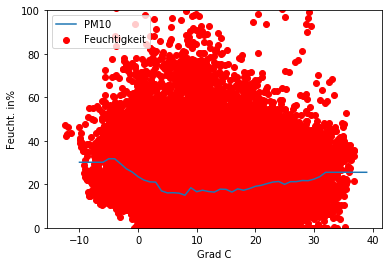

In [51]:
plt.plot(temp0, feucht)
plt.scatter(x,y, color = 'red')
axes = plt.gca()
axes.set_ylim([0,100])
plt.legend(['PM10', 'Feuchtigkeit'], loc=2)
plt.xlabel("Grad C")
plt.ylabel("Feucht. in%")

plt.show()